---
2023 ENPH 257 Thermodynamic Project  
Copyright (c) 2023 Yun Xing.  
Creative Common, Attribution, Non-commercial, Share-Alike.  


In [1]:
import scipy
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import seaborn as sns
import cftime
import math
np.random.seed(257)
sns.set_theme(style="whitegrid")
plt.rcParams.update({"axes.grid": True, "grid.alpha": 0.2})

In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 9
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize

# Surface Temperature approximation using CMIP6 simulations

---

## Background

The planetary radiation equilibrium must be achieved for the Earth's temperature to remian constant. This means on the top of atmosphere (TOA) the total incident radiation must equals the amount of emitted radiation. 
  
$$Q_{in}=Q_{out} \tag{1}$$
  
The incident shortwave radiation is proporational to the solar constant: 
  
$$Q_{in} = \frac{Q_0}{4}$$ 

The emitted shortwave radiation is proporational to the incident shortwave: 
  
$$Q_{out-SW} = \alpha \cdot \frac{Q_0}{4}$$
  
Where $\alpha$ is the albedo of the earth, the fraction of light reflected.
  
The longwave radiation emitted by the Earth is given by the Stefan-boltzmann law:

$$Q_{out-LW} = \sigma T_{earth}^4 $$ 
  
Thus, the radiation equilibrium eqn (1) becomes:
  
$$\frac{Q_0}{4} = \alpha \cdot \frac{Q_0}{4} + \sigma T_{earth}^4 \;\;\text{or}\;\; (1-\alpha)\frac{Q_0}{4} = \sigma T_{earth}^4 \tag{2}$$ 

The emitted longwave radiation can also be represented using temperature of surface and atmosphere: 
  
At top of the atmosphere(TOA): $$\frac{Q_0}{4} = \alpha \cdot \frac{Q_0}{4} + \epsilon \sigma T_{A}^4 + (1-\epsilon)\sigma T_{S}^4 \tag{3}$$
  
At surface: $$(1-\alpha) \cdot \frac{Q_0}{4} + \epsilon \sigma T_{A}^4 = \sigma T_{S}^4 \tag{4}$$   
Where $\epsilon$ is the emissivity of the atmosphere.
  
We can rearrange equation (3) and (4) to obtain:
  
$$\epsilon\sigma T_{S}^4 =  2\epsilon\sigma T_{A}^4 \tag{5}$$   
  
Eqn (5) suggests that temperature at surface is always higher than the temperature of the atmosphere. 
Substitute eqn (5) into eqn (4), we can obtain:
$$(1-\alpha) \cdot \frac{Q_0}{4} = \sigma T_{S}^4 - \epsilon \sigma T_{A}^4 = \sigma T_{S}^4 - \frac{1}{2}\epsilon \sigma T_{S}^4 = (1-\frac{1}{2}\epsilon) \sigma T_{S}^4 \tag{6}$$      
    
$$T_{S}=\left[\frac{Q_0(1-\alpha)}{4\sigma (1-\frac{1}{2}\epsilon)}\right]^\frac{1}{4} \tag{7}$$
  
**From eqn (7), we can see that if the absorption of the longwave radiation increase, the surface temperature increase. If the reflection of the shortwave radiation increase, the surface temperature drop.**

**Volcanic eruptions eject sulphate and form sulphate aerosol particles in the stratosphere. These particles will change both the absorption of the longwave radiation, and the reflection of the shortwave radiation.** 

### Research question: 
**How does the surface temperature change in the event of a volcanic eruption?**

---

## Methodology

I use a variable $R_L$ to denote the right hand side of eqn (6) - $(1-\frac{1}{2}\epsilon) \sigma T_{S}^4$, the total longwave emission. So $R_L$ depends on both $\epsilon$ and $T_S$.  
The left hand side of eqn (6) - $(1-\alpha) \cdot \frac{Q_0}{4}$, the total shortwave absorption,  depends on $\alpha$ and $T_S$.  
In radiative equilibrium, two are equal. If the composition of the atmosphere changes, there will be a change in the net radiation:
  
$$\Delta Q_{net} = (1-\alpha) \cdot \frac{Q_0}{4} - R_L \tag{8}$$


The new equilibrium response to the net radiation change can be approximated by a Taylor series expansion:
  
$$(1-\alpha_0)\frac{\Delta Q_0}{4} -\frac{Q_0}{4}\left(\frac{\partial \alpha}{\partial \tau}\Delta \tau + \frac{\partial \alpha}{\partial T_S} \Delta T_S \right) - \frac{\partial R_L}{\partial \tau} \Delta \tau - \frac{\partial R_L}{\partial T_S} \Delta T_S \tag{9} = 0$$

- $\tau$ is Aerosol Optical Depth, which indicates the opacity of the atmosphere. I will mainly use the $\tau $ value at the stratosphere. SAOD, is the abbreviation of Stratosphere Aerosol Optical Depth commonly using in atmosphere physics. Having sulphate aerosols in the stratosphere will influence both SW reflection and LW absorption. 
- $(1-\alpha_0)\frac{\Delta Q_0}{4}$ represents the change in the incident shortwave solar radiation. Since the change is small, and can only be observed during the 11 year sunspot cycle. I assume it to be zero in this approximation.   
- $\frac{\partial \alpha}{\partial \tau}\Delta \tau$ represents the change in albedo due to the change of sulphate content in atmosphere.
  
- $\frac{\partial \alpha}{\partial T_S} \Delta T_S$ represents the change in albedo due to the change in surface temperature, normally called climate feedback. 
- $\frac{\partial R_L}{\partial \tau} \Delta \tau$ represents the change in longwave emission due to the change of sulphate content in atmosphere.
- $\frac{\partial R_L}{\partial T_S} \Delta T_S$ represents the change in longwave emission due surface temperature.

Rearranging terms in eqn (9): 

$$-\frac{Q_0}{4}\frac{\partial \alpha}{\partial \tau}\Delta \tau - \frac{\partial R_L}{\partial \tau} \Delta \tau =   \frac{Q_0}{4}\frac{\partial \alpha}{\partial T_S}  \Delta T_S + \frac{\partial R_L}{\partial T_S} \Delta T_S $$

$$-\left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial \tau} + \frac{\partial R_L}{\partial \tau}\right) \Delta \tau =  \left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial T_S} + \frac{\partial R_L}{\partial T_S}\right)\Delta T_S$$

$$\Delta T_S = \frac{-\left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial \tau} + \frac{\partial R_L}{\partial \tau}\right) }{ \left(\frac{Q_0}{4}\frac{\partial \alpha}{\partial T_S} + \frac{\partial R_L}{\partial T_S}\right)}\Delta \tau \tag{10}$$

CIMP6, the coupled model intercomparison project phase 6 by the World Climate research Programme provides the suitable data for this approximation. CMIP6 starts with a central DECK which contains historical simulations to represent the Earth’s natural variability. The central DECK then branches into many directions. I use VolMIP to characterize the volcanic forcing from the characterizing forcing category. 
  
Specifically, I choose piControl, the pre-industrial control experiments from DECK historical simulation, and Volc-Pinatubo-Full from VolMIP. PiControl represent the natural variability of our earth’s climate system. Volc-Pinatubo-Full experiment represents an idealized 1991 Mt Pinatubo-like eruption with full forcing.


Luo (2018) provides the stratospheric aerosol value used in all the volc-pinatubo-full experiments. Around the Pinatubo period (June 1991 to December 1993), data are mostly constructed from satellite observations with minor gaps filled by ground-based lidar measurement.

$$\frac{\partial \alpha}{\partial \tau}, \; \frac{\partial R_L}{\partial \tau}\; \frac{\partial \alpha}{\partial T_S} \; \frac{\partial R_L}{\partial T_S}\; \text{and}\; \Delta \tau$$ 

  
can be obtianed from the above databases, so I can estimate the incremental surface temperature change $\Delta T_S$ and sum the incremental temperature over time to visualize the overall temperature change due to the 1991 Mt Pinatubo eruption.
  
Section 1 reads the $\tau$ value from Luo (2018).  
Section 2 calculates the historcial mean of $\alpha$ and $R_L$ from CIMP6 piControl.  
Section 3 calculates the at eruption value of $\alpha$ and $R_L$ from CIMP6 volc-pinatubo-full, also calculates the anomaly.  
Section 4 approximates the slope by simple linear regression and calculates the overall temperature change. 

---

**Some common time period to be used throughout the calculation:**

In [4]:
time_cf_noleap = (cftime.DatetimeNoLeap(1991, 8, 1, 0, 0, 0, 0, has_year_zero=True),
                  cftime.DatetimeNoLeap(1993, 12, 31, 0, 0, 0, 0, has_year_zero=True))

time_cf_360 = (cftime.Datetime360Day(1991, 8, 1, 0, 0, 0, 0, has_year_zero=True),
               cftime.Datetime360Day(1993, 12, 30, 0, 0, 0, 0, has_year_zero=True))

time_common_datetime = np.arange("1991-08", "1994-01", dtype='datetime64[M]')

# 1. Bring in `AOD` aerosol optical depth values
### 3.1 Import from local nc file

# 1. PiControl:
### 1.1 Prepare for import piControl experiment from 6 models

In [4]:
# empty xarray Dataset for each pi experiment 
pi_can = xr.Dataset()
pi_giss = xr.Dataset()
pi_ipsl = xr.Dataset()
pi_miroc = xr.Dataset()
pi_mpi = xr.Dataset()
pi_uk = xr.Dataset()

In [5]:
# a dictionary for piControl experiment's name, start time, end time, 
# empty xarray.Dataset, and empty dict to hold future statistical results 
pi_dict = {
    "can":{
        "name": "CanESM5_r1",
        "start": "5550",
        "end": "6600", 
        "pi_dset": pi_can,
        "stat": {}
    },
    "giss":{
        "name": "GISS-E2.1-G",
        "start": "8000",
        "end": "8399", 
        "pi_dset": pi_giss, 
        "stat": {}
    }, 
    "ipsl":{
        "name": "IPSL-CM6A-LR_r1i1p1f1",
        "start": "3050",
        "end": "3549",
        "pi_dset": pi_ipsl,
        "stat": {}
    },
    "miroc":{
        "name": "MIROC-ES2L_r1",
        "start": "1850",
        "end": "2349", 
        "pi_dset": pi_miroc,
        "stat": {}
    },
    "mpi":{
        "name": "MPI-ESM-LR",
        "start": "1850",
        "end": "2349", 
        "pi_dset": pi_mpi,
        "stat": {}
    },
    "uk":{
        "name": "UKESM1",
        "start": "2600",
        "end": "3199", 
        "pi_dset": pi_uk,
        "stat": {}
    }
}

### 1.2 Merge all piControl files, drop unnecessary variables, and modify time to cftime 

In [6]:
# loop through each experiment 
for pi in ["can",  "giss", "ipsl", "miroc", "uk"]:
    name = pi_dict[pi]["name"]
    start = pi_dict[pi]["start"]
    end = pi_dict[pi]["end"]
    
    # loop through four variables:
    for var in ["rlut", "rlutcs", "rsdt", "rsut", "rsutcs", "tas"]:
        file = f"data/piControl/piControl_{name}_{var}_{start}-{end}_GL.nc"
        next_dset = xr.open_dataset(file, decode_times=False)
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].merge(next_dset)
    
    # specific modification for individual experiment based on their file format 
    if pi == "can":
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].drop_vars(["time_bnds", "height"])
        
        # note the lat and lon in this datset is [0.0] and [0.0], 
        # the values already represent the global mean.
        # the following line only remove these two dimension. 
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].mean(["lat", "lon"])
        
        # change the time coordinates from float to cftime 
        pi_dict[pi]["pi_dset"]["time"] = cftime.num2date(pi_dict[pi]["pi_dset"].time, 
                                                         pi_dict[pi]["pi_dset"].time.units, 
                                                         calendar="noleap")

    if pi in ["ipsl", "miroc"]:
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].drop_vars("time_bnds")
        pi_dict[pi]["pi_dset"]["time"] = cftime.num2date(pi_dict[pi]["pi_dset"].time, 
                                                         pi_dict[pi]["pi_dset"].time.units, 
                                                         calendar="gregorian")
            
    if pi in ["ipsl"]:
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].mean(["lat", "lon"])
    
    if pi == "uk":
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].rename_dims({"MonthOfSimulation": "time"})
    
    # create new cftime based on the starting and ending years. The date within each month is set to be the 15th
    if pi in ["uk", "giss"]:
        dates_list = [
            cftime.DatetimeNoLeap(year, month, 15)
            for year, month in product(range(int(start), int(end)+1), range(1, 13))
        ]
        dates_array = xr.DataArray(dates_list, coords=[dates_list], dims=["time"], name="time")
        pi_dict[pi]["pi_dset"]["time"] = dates_array
    pi_dict[pi]["pi_dset"]["albedo"] = pi_dict[pi]["pi_dset"]["rsut"] / pi_dict[pi]["pi_dset"]["rsdt"]    

In [7]:
# seperated process for mpi (full-sky and clear-sky.units in different format) 
for pi in ["mpi"]:
    name = pi_dict[pi]["name"]
    start = pi_dict[pi]["start"]
    end = pi_dict[pi]["end"]
    
    dates_list = [
        cftime.DatetimeNoLeap(year, month, 15)
        for year, month in product(range(int(start), int(end)+1), range(1, 13))
    ]
    dates_array = xr.DataArray(dates_list, coords=[dates_list], dims=["time"], name="time")

    for var in ["rlut", "rlutcs", "rsdt", "rsut", "rsutcs", "tas"]:
        file = f"data/piControl/piControl_{name}_{var}_{start}-{end}_GL.nc"
        next_dset = xr.open_dataset(file, decode_times=False)
        next_dset["time"] = dates_array
        pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].merge(next_dset)
        
    pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].drop_vars("time_bnds")
    pi_dict[pi]["pi_dset"] = pi_dict[pi]["pi_dset"].mean(["lat", "lon"])
    pi_dict[pi]["pi_dset"]["albedo"] = pi_dict[pi]["pi_dset"]["rsut"] / pi_dict[pi]["pi_dset"]["rsdt"]

In [8]:
pi_dict["ipsl"]["pi_dset"]

<xarray.Dataset>
Dimensions:  (time: 6000)
Coordinates:
  * time     (time) object 3050-01-16 12:00:00 ... 3549-12-16 12:00:00
Data variables:
    rlut     (time) float32 234.8 235.3 236.3 235.8 ... 239.1 237.3 235.7 234.8
    rlutcs   (time) float32 259.9 260.6 261.9 262.7 ... 265.3 263.3 260.8 259.8
    rsdt     (time) float32 352.8 350.0 345.1 339.3 ... 337.9 343.7 349.2 352.6
    rsut     (time) float32 109.1 105.9 103.2 102.4 ... 100.1 106.1 110.6 111.8
    rsutcs   (time) float32 56.13 53.99 54.12 55.21 ... 50.69 55.09 59.63 59.2
    tas      (time) float32 283.6 284.1 284.9 285.8 ... 286.8 285.7 284.4 283.7
    albedo   (time) float32 0.3091 0.3025 0.2989 0.3018 ... 0.3086 0.3168 0.3172

### 1.3 Calculate the monthly mean of piControl and albedo

In [9]:
for pi in pi_list:
    pi_dict[pi]["monthly_dset"] = pi_dict[pi]["pi_dset"].groupby("time.month").mean("time")

In [10]:
pi_dict["mpi"]["monthly_dset"]

<xarray.Dataset>
Dimensions:  (month: 12)
Coordinates:
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    rlut     (month) float32 237.0 237.6 237.7 237.6 ... 241.2 238.6 236.5 236.4
    rlutcs   (month) float32 260.6 261.3 261.9 262.9 ... 265.6 263.4 261.4 260.6
    rsdt     (month) float32 351.3 348.3 343.2 337.4 ... 337.0 342.8 348.1 351.3
    rsut     (month) float32 106.9 103.0 99.59 99.07 ... 96.44 99.2 104.0 107.5
    rsutcs   (month) float32 54.19 53.4 53.74 55.24 ... 49.81 52.54 54.96 55.31
    tas      (month) float32 284.7 285.1 285.8 286.7 ... 287.6 286.6 285.6 284.8
    albedo   (month) float32 0.3043 0.2957 0.2901 0.2936 ... 0.2894 0.2987 0.306

### 1.4 De-seasonalize piControl by subtract pi-Control monthly mean

In [11]:
for pi in pi_list:

    pi_deseason = pi_dict[pi]["pi_dset"].groupby("time.month") - pi_dict[pi]["monthly_dset"]
    pi_deseason = pi_deseason.drop_vars("month")
    pi_dict[pi]["pi_deseason"] = pi_deseason

In [12]:
pi_dict["can"]["pi_deseason"]

<xarray.Dataset>
Dimensions:  (time: 12612)
Coordinates:
  * time     (time) object 5550-01-16 12:00:00 ... 6600-12-16 12:00:00
Data variables:
    rlut     (time) float32 -0.2937 -0.4717 0.06487 ... 0.6469 0.2856 -0.2287
    rlutcs   (time) float32 0.05615 -0.3408 -0.0683 ... 0.2087 0.05627 -0.1905
    rsdt     (time) float32 -3.052e-05 -3.052e-05 0.0 ... 0.0 -6.104e-05
    rsut     (time) float32 0.05081 -0.6442 -0.07987 ... -0.5114 -0.06194
    rsutcs   (time) float32 0.1452 -0.1341 0.7277 ... -0.1843 -0.4396 -0.3366
    tas      (time) float32 0.03891 -0.05701 0.1188 ... -0.01016 0.05453 -0.1245
    albedo   (time) float32 0.0001446 -0.001847 ... -0.001471 -0.0001764

### 1.5 Add other desired variables 

In [13]:
for pi in pi_list:
    pi_dict[pi]["pi_deseason"] = add_variables(pi_dict[pi]["pi_deseason"])

In [14]:
pi_dict["giss"]["pi_deseason"]

<xarray.Dataset>
Dimensions:        (time: 4800)
Coordinates:
  * time           (time) object 8000-01-15 00:00:00 ... 8399-12-15 00:00:00
Data variables: (12/16)
    rlut           (time) float32 -0.2854 0.3709 0.5277 ... -0.6028 -0.5698
    rlutcs         (time) float32 -0.8045 0.06033 0.08981 ... -0.6501 -0.5281
    rsdt           (time) float32 -3.052e-05 3.052e-05 ... 3.052e-05 0.0
    rsut           (time) float32 -0.4348 -1.026 -0.292 ... 0.2401 -0.3274
    rsutcs         (time) float32 0.2351 0.1957 0.2103 ... 0.02642 -0.3098
    tas            (time) float32 -0.3915 -0.1648 -0.1926 ... -0.1635 -0.08502
    ...             ...
    sw_clear_sky   (time) float32 -0.2351 -0.1957 -0.2103 ... -0.02639 0.3098
    lw_clear_sky   (time) float32 0.8045 -0.06033 -0.08981 ... 0.6501 0.5281
    net_clear_sky  (time) float32 0.5694 -0.256 -0.3001 ... 0.6237 0.8379
    sw_cre         (time) float32 0.6699 1.221 0.5023 ... -0.2137 0.01765
    lw_cre         (time) float32 -0.5191 -0.3105 -0.4379 ... -0.0473 0.04173
    net_cre        (time) float32 0.1508 0.9108 0.06439 ... -0.261 0.05938

---

# 2. Volc-pinatubo-full
### 2.1 Import VolMIP UKESM1-0-LL volc-pinatubo-full from local


In [15]:
# empty xarray Dataset for each volcano experiment 
volc_can = xr.Dataset()
volc_giss = xr.Dataset()
volc_ipsl = xr.Dataset()
volc_miroc = xr.Dataset()
volc_mpi = xr.Dataset()
volc_uk = xr.Dataset()

In [16]:
# a dictionary for volc-pinatubo-full experiment's name, start time, end time, and xarray.Dataset 
volc_dict = {
    
    # volc-pinatubo-full_CanESM5_r1_rlut_1991-1996_GL.nc
    "can":{
        "name": "CanESM5",
        "num_r": 40,
        "start": "1991",
        "end": "1996", 
        "volc_dset": volc_can,
        "stat": {}
    },
    
            
    # volc-pinatubo-full_GISS-E2.1-G_r1_rlut_1991-1994_GL.nc
    "giss":{
        "name": "GISS-E2.1-G",
        "num_r": 25,     # using only 25 members, the rest realization's data value are non-interpretable
        "start": "1991",
        "end": "1994", 
        "volc_dset": volc_giss,    
        "stat": {}
    },
    
    # volc-pinatubo-full_IPSL-CM6A-LR_r1i1p1f1_rlut_199106-200012_GL.nc
    "ipsl":{
        "name": "IPSL-CM6A-LR",
        "num_r": 25,
        "start": "199106",
        "end": "200012",
        "volc_dset": volc_ipsl,
        "stat": {}
    },
    
    # volc-pinatubo-full_MIROC-ES2L_r1_rlut_199106-199412_GL.nc
    "miroc":{
        "name": "MIROC-ES2L",
        "num_r": 25,
        "start": "199106",
        "end": "199412", 
        "volc_dset": volc_miroc,
        "stat": {}
    },
    
    # volc-pinatubo-full_MPI-ESM-LR_r1_rlut_1991-1996_GL.nc
    "mpi":{
        "name": "MPI-ESM-LR",
        "num_r": 25,
        "start": "1991",
        "end": "1996", 
        "volc_dset": volc_mpi,
        "stat": {}
    },
    
    # volc-pinatubo-full_UKESM1_r1_rlut_1991-1993_GL.nc
    "uk":{
        "name": "UKESM1",
        "num_r": 25,
        "start": "1991",
        "end": "1993", 
        "volc_dset": volc_uk,
        "stat": {}
    }
}

### 2.2 Merge all volc files, drop unnecessary variables, and modify time to cftime 

In [17]:
for volc in volc_list:
    
    name = volc_dict[volc]["name"]
    member = volc_dict[volc]["num_r"]
    start = volc_dict[volc]["start"]
    end = volc_dict[volc]["end"]

    for r in range(1, member+1):
        member_dset = xr.Dataset()
        for var in ["rlut", "rlutcs", "rsdt", "rsut", "rsutcs", "tas"]:
            if volc in ["can", "miroc", "mpi", "uk", "giss"]:
                file = f"data/volc-pinatubo-full/volc-pinatubo-full_{name}_r{r}_{var}_{start}-{end}_GL.nc"
            else:
                file = f"data/volc-pinatubo-full/volc-pinatubo-full_{name}_r{r}i1p1f1_{var}_{start}-{end}_GL.nc"
            next_dset = xr.open_dataset(file, decode_times=False)
            member_dset = member_dset.merge(next_dset)
        member_dset_add_coor = member_dset.assign_coords({"member_id": f"r{r}"})
        member_dset_expanded = member_dset_add_coor.expand_dims("member_id")
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].merge(member_dset_expanded)
    
    if volc == "can":
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].drop_vars("height")

    if volc in ["can", "ipsl"]:
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].drop_vars("time_bnds")
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].mean(["lat", "lon"])
        volc_dict[volc]["volc_dset"]["time"] = cftime.num2date(volc_dict[volc]["volc_dset"].time, 
                                                               volc_dict[volc]["volc_dset"].time.units, 
                                                               calendar="noleap")
        
    if volc in ["miroc", "giss"]:
        volc_dict[volc]["volc_dset"]["time"] = cftime.num2date(volc_dict[volc]["volc_dset"].time, 
                                                               volc_dict[volc]["volc_dset"].time.units, 
                                                               calendar="360_day") 
        
    if volc == "mpi":
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].mean(["lat", "lon", "lev"])
        volc_dict[volc]["volc_dset"] = volc_dict[volc]["volc_dset"].drop_vars(["hyai", "hybi", "hyam", "hybm"])

    if volc in ["mpi", "uk"]:
        dates_list = [
            cftime.DatetimeNoLeap(year, month, 15)
            for year, month in product(range(int(start), int(end)+1), range(1, 13))
        ]
        dates_array = xr.DataArray(dates_list, coords=[dates_list], dims=["time"], name="time")
        volc_dict[volc]["volc_dset"]["time"] = dates_array
        
    
    volc_dict[volc]["volc_dset"]["albedo"] = volc_dict[volc]["volc_dset"]["rsut"] / volc_dict[volc]["volc_dset"]["rsdt"]    

In [18]:
volc_dict["mpi"]["volc_dset"]

<xarray.Dataset>
Dimensions:    (time: 72, member_id: 25)
Coordinates:
  * time       (time) object 1991-01-15 00:00:00 ... 1996-12-15 00:00:00
  * member_id  (member_id) <U3 'r1' 'r10' 'r11' 'r12' ... 'r6' 'r7' 'r8' 'r9'
Data variables:
    rlut       (member_id, time) float32 236.9 237.8 237.7 ... 238.4 236.4 236.5
    rlutcs     (member_id, time) float32 260.3 261.2 261.8 ... 263.2 261.3 260.2
    rsdt       (member_id, time) float32 351.3 348.3 343.2 ... 342.8 348.1 351.3
    rsut       (member_id, time) float32 105.7 103.1 98.96 ... 98.63 104.2 108.0
    rsutcs     (member_id, time) float32 54.03 53.21 53.65 ... 52.91 55.16 55.18
    tas        (member_id, time) float32 284.6 285.0 285.7 ... 286.6 285.6 284.7
    albedo     (member_id, time) float32 0.301 0.2961 0.2883 ... 0.2992 0.3074

### 2.3 De-seasonalize volc-pinatubo-full by subtract pi-Control monthly mean

In [19]:
for volc in volc_list:

    volc_deseason = volc_dict[volc]["volc_dset"].groupby("time.month") - pi_dict[volc]["monthly_dset"]
    volc_deseason = volc_deseason.drop_vars("month")
    volc_dict[volc]["volc_deseason"] = volc_deseason

In [20]:
volc_dict["can"]

{'name': 'CanESM5',
 'num_r': 40,
 'start': '1991',
 'end': '1996',
 'volc_dset': <xarray.Dataset>
 Dimensions:    (time: 60, member_id: 40)
 Coordinates:
   * time       (time) object 1991-06-16 00:00:00 ... 1996-05-16 12:00:00
   * member_id  (member_id) <U3 'r1' 'r10' 'r11' 'r12' ... 'r6' 'r7' 'r8' 'r9'
 Data variables:
     rlut       (member_id, time) float32 242.7 243.8 243.3 ... 237.6 237.8 239.7
     rlutcs     (member_id, time) float32 268.5 269.1 268.2 ... 261.9 263.4 265.8
     rsdt       (member_id, time) float32 329.8 329.4 331.8 ... 343.8 337.9 332.8
     rsut       (member_id, time) float32 97.03 95.57 97.04 ... 99.31 98.8 98.74
     rsutcs     (member_id, time) float32 53.85 51.02 51.34 ... 55.53 57.34 57.06
     tas        (member_id, time) float32 288.2 288.5 288.2 ... 284.8 286.1 287.1
     albedo     (member_id, time) float32 0.2942 0.2902 0.2924 ... 0.2924 0.2966,
 'stat': {},
 'volc_deseason': <xarray.Dataset>
 Dimensions:    (time: 60, member_id: 40)
 Coordinates

### 2.4 Add other desired variables 

In [21]:
for volc in volc_list:
    volc_dict[volc]["volc_deseason"] = add_variables(volc_dict[volc]["volc_deseason"])

In [22]:
volc_dict["giss"]["volc_deseason"]

<xarray.Dataset>
Dimensions:        (time: 48, member_id: 25)
Coordinates:
  * time           (time) object 1991-01-16 12:00:00 ... 1994-12-16 12:00:00
  * member_id      (member_id) <U3 'r1' 'r10' 'r11' 'r12' ... 'r7' 'r8' 'r9'
Data variables: (12/16)
    rlut           (member_id, time) float32 -0.3911 0.5608 0.3825 ... nan nan
    rlutcs         (member_id, time) float32 -0.01151 0.5036 0.49 ... nan nan
    rsdt           (member_id, time) float32 -3.052e-05 3.052e-05 ... nan nan
    rsut           (member_id, time) float32 0.3463 0.09459 0.1231 ... nan nan
    rsutcs         (member_id, time) float32 0.007381 0.04738 0.1323 ... nan nan
    tas            (member_id, time) float32 0.1188 0.03983 0.08231 ... nan nan
    ...             ...
    sw_clear_sky   (member_id, time) float32 -0.007412 -0.04735 ... nan nan
    lw_clear_sky   (member_id, time) float32 0.01151 -0.5036 -0.49 ... nan nan
    net_clear_sky  (member_id, time) float32 0.004093 -0.551 -0.6223 ... nan nan
    sw_cre         (member_id, time) float32 -0.3389 -0.04721 ... nan nan
    lw_cre         (member_id, time) float32 0.3796 -0.05721 0.1074 ... nan nan
    net_cre        (member_id, time) float32 0.04068 -0.1044 0.1166 ... nan nan

### 2.5 Visualize variables from Volc-pinatubo-full in all 6 models 

In [23]:
for volc in volc_list:
    volc_dict[volc]["volc_df"] = transform_to_df(volc_dict[volc]["volc_deseason"])

In [145]:
can_volc_df = volc_dict["can"]["volc_df"].groupby("time").mean()[2:25]  # from 1991-08-16 to 1993-12-16
can_volc_df["saod"] = aod_anomaly[0:23]
can_volc_df

C:\Users\xing_\AppData\Local\Temp\ipykernel_16304\243682723.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  can_volc_df = volc_dict["can"]["volc_df"].groupby("time").mean()[2:25]  # from 1991-08-16 to 1993-12-16


,rlut,rlutcs,rsdt,rsut,rsutcs,tas,albedo,sw_all_sky,lw_all_sky,net_all_sky,sw_clear_sky,lw_clear_sky,net_clear_sky,sw_cre,lw_cre,net_cre,saod
time,,,,,,,,,,,,,,,,,
1991-08-16,-0.724052,-1.028228,0.000000,1.859793,2.767504,-0.049545,0.005605,-1.859793,0.724052,-1.135741,-2.767504,1.028228,-1.739277,0.907711,-0.304176,0.603535,0.066123
1991-09-16,-0.878033,-1.234677,-0.000031,2.400163,3.510009,-0.090829,0.007134,-2.400194,0.878033,-1.522161,-3.510040,1.234677,-2.275363,1.109846,-0.356644,0.753202,0.077574
1991-10-16,-0.865163,-1.379726,-0.000031,2.622696,4.009578,-0.118832,0.007663,-2.622726,0.865163,-1.757563,-4.009608,1.379726,-2.629883,1.386882,-0.514562,0.872320,0.089812
1991-11-16,-1.155060,-1.653152,0.000000,2.951628,4.533420,-0.189104,0.008491,-2.951628,1.155060,-1.796568,-4.533420,1.653152,-2.880268,1.581792,-0.498092,1.083699,0.101683
1991-12-16,-1.145929,-1.612492,-0.000092,3.028363,4.678760,-0.168904,0.008627,-3.028454,1.145929,-1.882525,-4.678851,1.612492,-3.066359,1.650398,-0.466563,1.183834,0.104500
1992-01-16,-1.008298,-1.549149,-0.000031,3.120891,4.647666,-0.218199,0.008882,-3.120921,1.008298,-2.112623,-4.647696,1.549149,-3.098547,1.526775,-0.540851,0.985924,0.105378
1992-02-15,-1.105495,-1.602523,-0.000031,3.000421,4.539461,-0.221725,0.008605,-3.000451,1.105495,-1.894956,-4.539491,1.602523,-2.936968,1.539040,-0.497028,1.042013,0.106832
1992-03-16,-1.217769,-1.754151,-0.000031,2.891201,4.370189,-0.271407,0.008410,-2.891231,1.217769,-1.673462,-4.370219,1.754151,-2.616068,1.478988,-0.536382,0.942606,0.104921
1992-04-16,-1.304239,-1.859252,-0.000061,2.715260,4.256406,-0.284809,0.008035,-2.715321,1.304239,-1.411083,-4.256467,1.859252,-2.397215,1.541146,-0.555014,0.986133,0.102956


<Axes: xlabel='time', ylabel='saod'>

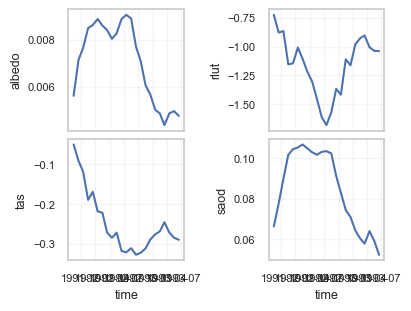

In [78]:
fig, axs = plt.subplots(nrows=2, ncols=2, sharex=True, figsize=(4, 3), constrained_layout=True)
sns.lineplot(ax=axs[0, 0], data=can_volc_df, x="time", y="albedo")
sns.lineplot(ax=axs[0, 1], data=can_volc_df, x="time", y="rlut")
sns.lineplot(ax=axs[1, 0], data=can_volc_df, x="time", y="tas")
sns.lineplot(ax=axs[1, 1], data=can_volc_df, x="time", y="saod")
#     axs[row, col].get_legend().remove()

Text(0.6, 0.2, 'F = -0.598 + 2.259T')

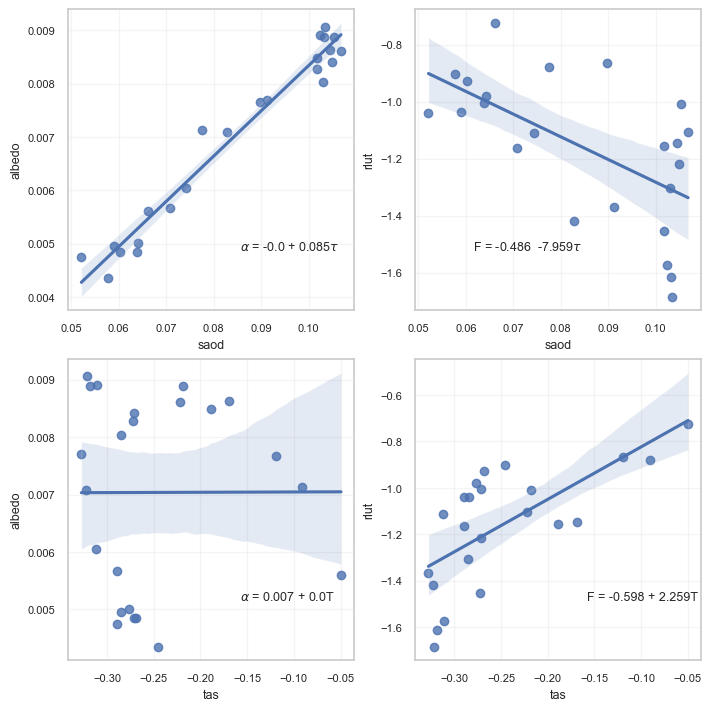

In [153]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(7, 7), constrained_layout=True)

albedo_saod = sns.regplot(ax=axs[0, 0], data=can_volc_df, y="albedo", x="saod")
s_as, i_as, r, p, sterr = scipy.stats.linregress(x=can_volc_df["saod"], y=can_volc_df["albedo"])
albedo_saod.annotate(r"$\alpha$ = " + str(round(i_as, 3)) + " + " + str(round(s_as, 3)) + r"$\tau$",
                     xy=(0.6, 0.2), xycoords="axes fraction")

rlut_saod = sns.regplot(ax=axs[0, 1], data=can_volc_df, y="rlut", x="saod")
s_rs, i_rs, r, p, sterr = scipy.stats.linregress(x=can_volc_df["saod"], y=can_volc_df["rlut"])
rlut_saod.annotate(r"F = " + str(round(i_rs, 3)) + "  " + str(round(s_rs, 3)) + r"$\tau$",
                     xy=(0.2, 0.2), xycoords="axes fraction")

albedo_tas = sns.regplot(ax=axs[1, 0], data=can_volc_df, y="albedo", x="tas")
s_at, i_at, r, p, sterr = scipy.stats.linregress(x=can_volc_df["tas"], y=can_volc_df["albedo"])
albedo_tas.annotate(r"$\alpha$ = " + str(round(i_at, 3)) + " + " + str(round(s_at, 3)) + r"T",
                     xy=(0.6, 0.2), xycoords="axes fraction")


rlut_tas = sns.regplot(ax=axs[1, 1], data=can_volc_df, y="rlut", x="tas")
s_rt, i_rt, r, p, sterr = scipy.stats.linregress(x=can_volc_df["tas"], y=can_volc_df["rlut"])
rlut_tas.annotate(r"F = " + str(round(i_rt, 3)) + " + " + str(round(s_rt, 3)) + r"T",
                     xy=(0.6, 0.2), xycoords="axes fraction")


In [180]:
Q = 1360
denominator = Q/4 * s_at + s_rt

delta_saod = list(0 for i in range(22))
numerators = list(0 for i in range(22))
delta_tas = list(0 for i in range(23))
for i in range(22):
    delta_saod[i] = can_volc_df["saod"][i+1] - can_volc_df["saod"][i]
    numerators[i] = (- Q/4* s_as - s_rs)*delta_saod[i]
#     numerators[i] = (- Q/4* s_as)*delta_saod[i]
    delta_tas[i+1] = numerators[i]/denominator

delta_tas

[0,
 -0.10506452501824949,
 -0.11228873138483149,
 -0.10891605876767901,
 -0.025843325244122178,
 -0.008064349595088055,
 -0.013339273279745675,
 0.017534247190282966,
 0.01803423153310586,
 0.011204530176426922,
 -0.013030013070977453,
 -0.003470495640748251,
 0.010821509630509958,
 0.10156661705572492,
 0.07721353773360701,
 0.07884091362439752,
 0.03115509491740183,
 0.061701923402969074,
 0.03568318664344035,
 0.024048399226963203,
 -0.05696950392184475,
 0.043926775908596984,
 0.06359815879886246]

In [181]:
delta_tas_cumsum = np.cumsum(delta_tas)
delta_tas_cumsum

array([ 0.        , -0.10506453, -0.21735326, -0.32626932, -0.35211264,
       -0.36017699, -0.37351626, -0.35598202, -0.33794778, -0.32674325,
       -0.33977327, -0.34324376, -0.33242225, -0.23085564, -0.1536421 ,
       -0.07480119, -0.04364609,  0.01805583,  0.05373902,  0.07778742,
        0.02081792,  0.06474469,  0.12834285])

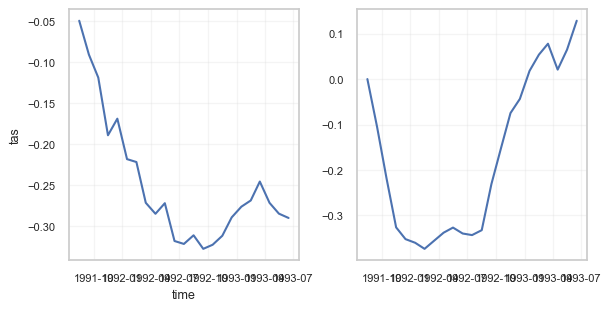

In [182]:
fig, axs = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(6, 3), constrained_layout=True)
sns.lineplot(ax=axs[0], data=can_volc_df, x="time", y="tas")
axs[1].plot(volc_dict["can"]["volc_df"]["time"].unique()[2:25], delta_tas_cumsum, label="aod_anomaly")

# sns.lineplot(data=can_volc_df, x="time", y="albedo")

In [154]:
aod_common_anomaly

<xarray.DataArray 'aod' (time: 29)>
array([0.06612257, 0.0775736 , 0.08981201, 0.10168283, 0.1044995 ,
       0.10537844, 0.1068323 , 0.10492123, 0.10295567, 0.10173448,
       0.10315463, 0.10353288, 0.10235344, 0.09128364, 0.0828681 ,
       0.07427519, 0.07087958, 0.06415465, 0.06026553, 0.05764448,
       0.06385361, 0.05906601, 0.05213442, 0.04796259, 0.04327784,
       0.03910119, 0.03353823, 0.02471215, 0.02053715], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1991-08-01 1991-09-01 ... 1993-12-01

In [152]:
numerator/denominator
# numerator/1.8

-0.08312173903022366

<Axes: xlabel='tas', ylabel='rlut'>

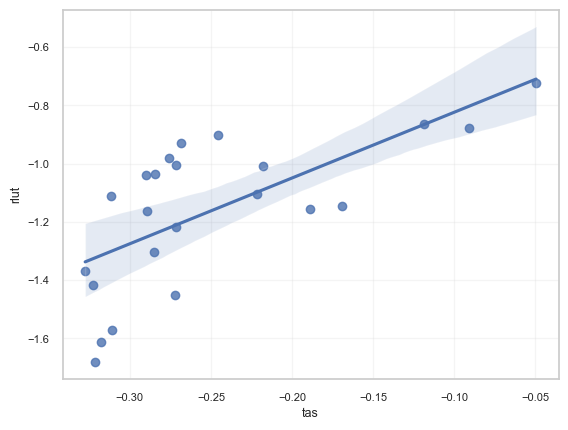

In [81]:
sns.regplot(data=can_volc_df, x="tas", y="rlut")

<Axes: xlabel='albedo', ylabel='rlut'>

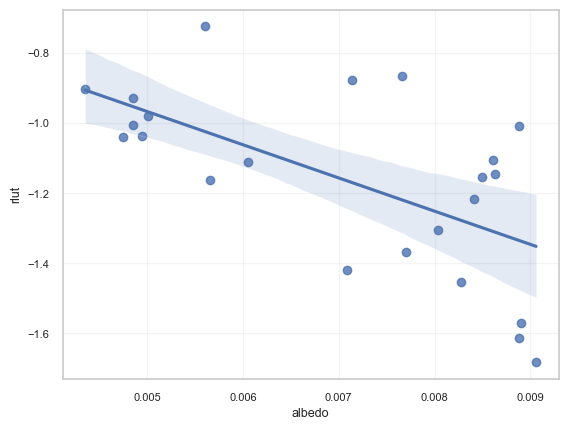

In [95]:
sns.regplot(data=can_volc_df, x="albedo", y="rlut")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


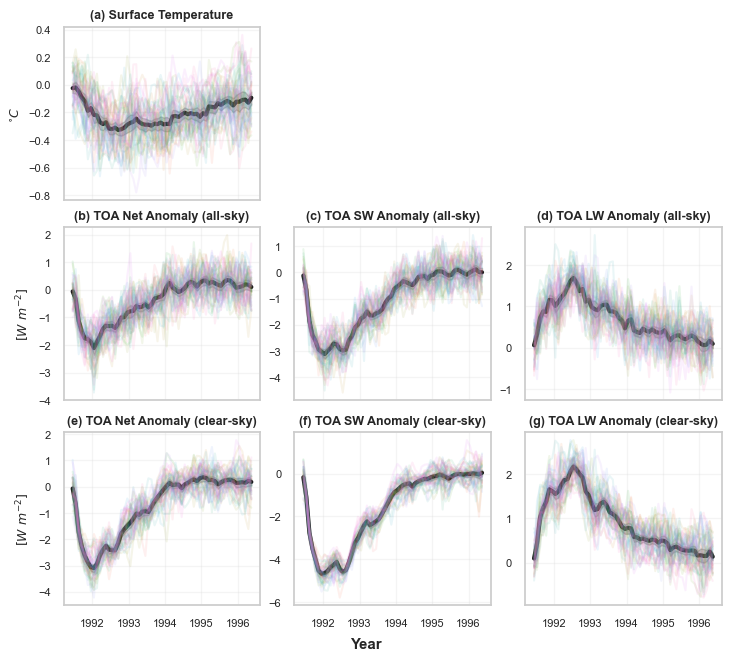

In [24]:
plot_time_series_one_model(volc_dict["can"]["volc_df"], "CanESM5")
# plot_time_series_one_model(volc_dict["giss"]["volc_df"], "GISS-E2.1-G")
# plot_time_series_one_model(volc_dict["ipsl"]["volc_df"], "IPSL-CM6A-LR")
# plot_time_series_one_model(volc_dict["miroc"]["volc_df"], "MIROC-ES2L")
# plot_time_series_one_model(volc_dict["mpi"]["volc_df"], "MPI-ESM1.2-LR")
# plot_time_series_one_model(volc_dict["uk"]["volc_df"], "UKESM1")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


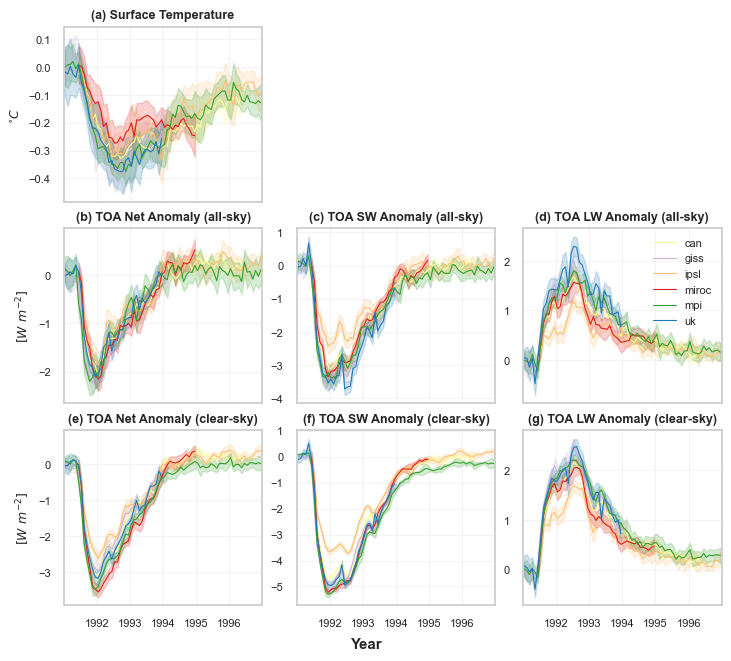

In [25]:
plot_time_series_all_volc_models(volc_dict)

---

In [33]:
# import file with variable extinction
file = "data/CMIP_1850_2014_extinction_550nm_strat_only_v3.nc"
aod = xr.open_dataset(file)

# format time form "month since" to datetime64
aod = aod.rename({"month": "time"})

dates_list = np.arange("1850-01", "2015-01", dtype='datetime64[M]')

aod["time"] = xr.DataArray(
    dates_list, 
    coords=[dates_list], 
    dims=["time"], name="time"
)

In [34]:
aod

<xarray.Dataset>
Dimensions:   (latitude: 36, altitude: 70, time: 1980)
Coordinates:
  * latitude  (latitude) float32 -87.5 -82.5 -77.5 -72.5 ... 72.5 77.5 82.5 87.5
  * altitude  (altitude) float32 5.0 5.5 6.0 6.5 7.0 ... 38.0 38.5 39.0 39.5
  * time      (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01
Data variables:
    ext550    (latitude, altitude, time) float32 ...

In [35]:
# calculate AOD as cummulative ext
aod_array = np.cumsum(aod.ext550, axis=1) * 0.5
aod["aod"] = aod_array

# create weights by the cosine of the latitude
weights = np.cos(np.deg2rad(aod.latitude))

# Area weighted average over latitude 
aod_w = aod.weighted(weights)
aod_wm = aod_w.mean("latitude")

# Select the aod at the highest altitude only
aod = aod_wm["aod"].sel(altitude=39.5).drop_vars("altitude")

In [36]:
aod_wm

<xarray.Dataset>
Dimensions:   (altitude: 70, time: 1980)
Coordinates:
  * altitude  (altitude) float32 5.0 5.5 6.0 6.5 7.0 ... 38.0 38.5 39.0 39.5
  * time      (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01
Data variables:
    ext550    (altitude, time) float32 0.0 0.0 0.0 ... 2.842e-06 2.842e-06
    aod       (altitude, time) float32 0.0 0.0 0.0 ... 0.006779 0.006792

In [37]:
aod

<xarray.DataArray 'aod' (time: 1980)>
array([0.00276368, 0.0027699 , 0.00274665, ..., 0.00711638, 0.00677946,
       0.00679216], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1850-01-01 1850-02-01 ... 2014-12-01

### 3.2 Find the background value of AOD around pinatubo

In [38]:
# the mean value of the entire aod 
aod_bg = aod.mean().item()
aod_bg

0.01067265123128891

### 3.3 Slice a period of AOD common to all six models

In [39]:
aod_anomaly_list = ["can", "giss", "ipsl", "miroc", "uk"]
aod_raw_list = ["mpi"]

In [40]:
# aod_as_anomaly to be used for models in the aod_anomaly_list
aod_common_anomaly = aod.sel(time=slice(time_common_datetime[0], 
                                        time_common_datetime[-1])) - aod_bg
aod_anomaly = aod_common_anomaly.values


# aod_as_raw to be used for model: MPI-ESM-LR
aod_common_raw = aod.sel(time=slice(time_common_datetime[0], 
                                    time_common_datetime[-1]))
aod_raw = aod_common_raw.values

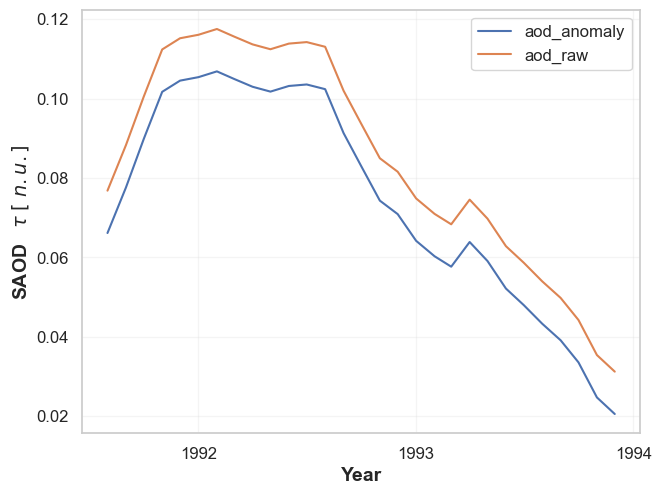

In [41]:
fig, ax = plt.subplots(figsize=(7.2, 5.5))

ax.plot(aod_common_anomaly.time.values, aod_anomaly, label="aod_anomaly")
ax.plot(aod_common_anomaly.time.values, aod_raw, label="aod_raw")
plt.gca().xaxis.set_major_locator(mdates.YearLocator())

plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.legend(frameon=False)
ax.set_xlabel("Year", weight="bold", fontsize=14)
ax.set_ylabel(r"SAOD   $\tau$ $[~n.u.]$", weight="bold", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

title = "Figure 1"
# fig.savefig(f"plot/{title}.eps", dpi = 1200)
# fig.savefig(f"plot/{title}.png", dpi = 1200)
# fig.savefig(f"plot/{title}.svg", dpi = 1200)

---

# 4. Create a Dataset for $R$, $T$, $\tau$, $x$, $y$, $\delta{x}$, $\delta{y}$

**We assume no error in $\tau$.  
The error in $R$ and $T$ has the value of one standard deviation among ensemble members.**

$$\frac{N}{\tau}=\alpha+\lambda\frac{T}{\tau}$$  
  
$$x = \frac{T}{\tau}~~~~~~~~\delta{x}=\frac{\partial}{\partial{T}}\frac{T}{\tau}=\frac{\delta{T}}{\tau}$$  
  
$$y = \frac{N}{\tau}~~~~~~~~\delta{y}=\frac{\partial}{\partial{N}}\frac{N}{\tau}=\frac{\delta{N}}{\tau}$$  

**A variation in linear approximation is considered here:**

$$\frac{N}{(1-e^{-\tau})}=\alpha+\lambda\frac{T}{(1-e^{-\tau})}$$  
  
$$x = \frac{T}{(1-e^{-\tau})}~~~~~~~~\delta{x}=\frac{\partial}{\partial{T}}\frac{T}{(1-e^{-\tau})}=\frac{\delta{T}}{(1-e^{-\tau})}$$  
  
$$y = \frac{N}{(1-e^{-\tau})}~~~~~~~~\delta{y}=\frac{\partial}{\partial{N}}\frac{N}{(1-e^{-\tau})}=\frac{\delta{N}}{(1-e^{-\tau})}$$  

**In this method, the data points with a large $\tau$ value will have a smaller error in both x and y.  
It is an approach to emphasize the impact of data points close to the eruption time.**

### Prepare tha dataset for the simple linear model and complex linear model

In [36]:
radiation_variable_list = ["sw_all_sky", "lw_all_sky", "net_all_sky",
                           "sw_clear_sky", "lw_clear_sky", "net_clear_sky",
                           "sw_cre", "lw_cre", "net_cre"]

In [37]:
for volc in volc_list:
    
    # data for the numerator of x-axis, same for any radiation 
    tas_darray = volc_dict[volc]["volc_deseason"]["tas"].mean("member_id")
    
    # data for the denominator of x and y-axis, same for any radiation 
    if volc in aod_anomaly_list:
        aod = aod_anomaly
    else:
        aod = aod_raw
    
    # data for the numerator of y-axis, create 18 different datasets 
    # (9 different radiation x 2 different equations)
    for rad in radiation_variable_list:
        
        rad_darray = volc_dict[volc]["volc_deseason"][rad].mean("member_id")

        if volc in ["can", "ipsl", "mpi", "uk"]:
            rad_array = rad_darray.sel(time=slice(time_cf_noleap[0], time_cf_noleap[1])).values
            tas_array = tas_darray.sel(time=slice(time_cf_noleap[0], time_cf_noleap[1])).values
        else:
            rad_array = rad_darray.sel(time=slice(time_cf_360[0], time_cf_360[1])).values
            tas_array = tas_darray.sel(time=slice(time_cf_360[0], time_cf_360[1])).values
            
        # error in tas as one standard deviation
        err_tas = tas_array.std()
        # error in rad as one standard deviation
        err_rad = rad_array.std()
        
        # Simple linear dataset using F = alpha * aod
        x = tas_array / aod
        err_x = err_tas / aod
        y = rad_array / aod
        err_y = err_rad / aod
        
        r_t_dset = xr.Dataset(
            {
                "aod": (["time"], aod),
                "tas": (["time"], tas_array),
                rad: (["time"], rad_array),
                "tas/aod": (["time"], x),
                "err_in_x": (["time"], err_x),
                f"{rad}/aod": (["time"], y),
                "err_in_y": (["time"], err_y),
            },
            coords={
                "time": time_common_datetime
            }
        )
        r_t_add_coor = r_t_dset.assign_coords({"model": volc_dict[volc]["name"]})
        r_t_expanded = r_t_add_coor.expand_dims("model")

        volc_dict[volc][f"{rad}_t_dset"] = r_t_expanded
        
        # Complex linear dataset using F = alpha * (1-e^(-aod))
        x_complex = tas_array / (1 - math.e ** (-aod))
        err_x_complex = err_tas / (1 - math.e ** (-aod))
        y_complex = rad_array / (1 - math.e ** (-aod))
        err_y_complex = err_rad / (1 - math.e ** (-aod))

        r_t_dset_complex = xr.Dataset(
            {
                "aod": (["time"], aod),
                "tas": (["time"], tas_array),
                rad: (["time"], rad_array),
                "tas/aod": (["time"], x_complex),
                "err_in_x": (["time"], err_x_complex),
                f"{rad}/aod": (["time"], y_complex),
                "err_in_y": (["time"], err_y_complex),
            },
            coords={
                "time": time_common_datetime
            }
        )
        r_t_complex_add_coor = r_t_dset_complex.assign_coords({"model": volc_dict[volc]["name"]})
        r_t_complex_expanded = r_t_complex_add_coor.expand_dims("model")

        volc_dict[volc][f"{rad}_t_dset_complex"] = r_t_complex_expanded

In [38]:
# volc_dict["giss"]

# 5. Linear fit using scipy.odr & make pandas dataframe for results

In [39]:
for volc in volc_list:
    
    for rad in radiation_variable_list:

        for dset_name in ["_t_dset", "_t_dset_complex"]:
            
            dset = f"{rad}{dset_name}"
            
            x = volc_dict[volc][dset]["tas/aod"][0, :].values
            y = volc_dict[volc][dset][f"{rad}/aod"][0, :].values
            err_x = volc_dict[volc][dset]["err_in_x"][0, :].values
            err_y = volc_dict[volc][dset]["err_in_y"][0, :].values
            
            normal, inverse = linear_fit(x, y, err_x, err_y)
            volc_dict[volc]["stat"][f"{rad}{dset_name[7:]}"] = normal
            volc_dict[volc]["stat"][f"{rad}{dset_name[7:]}_inverse"] = inverse
            

### Save regression result into csv

A pandas dataframe in long form

In [40]:
volc_forcing_df_long = pd.DataFrame(columns=["model", "radiation", "cloud", "simple_linear", "parameter", "value", "se"])

for volc in volc_list:
    for rad in ["sw", "lw", "net"]:
        for cloud in ["_all_sky", "_clear_sky", "_cre"]:
            for linear in ["", "_complex"]:
                out = volc_dict[volc]["stat"][f"{rad}{cloud}{linear}"]
                for parameter in ["alpha", "lambda"]:
                
                    row = pd.DataFrame.from_dict({
                        "model": [volc], 
                        "radiation": [rad], 
                        "cloud": [cloud], 
                        "simple_linear": True if linear == "" else False,
                        "parameter": [parameter], 
                        "value": out.beta[1] if parameter == "alpha" else out.beta[0], 
                        "se": out.sd_beta[1] if parameter == "alpha" else out.sd_beta[0], 
                    })
                    volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)

C:\Users\xing_\AppData\Local\Temp\ipykernel_7968\4193338439.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)
C:\Users\xing_\AppData\Local\Temp\ipykernel_7968\4193338439.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)
C:\Users\xing_\AppData\Local\Temp\ipykernel_7968\4193338439.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)
C:\Users\xing_\AppData\Local\Te

C:\Users\xing_\AppData\Local\Temp\ipykernel_7968\4193338439.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)
C:\Users\xing_\AppData\Local\Temp\ipykernel_7968\4193338439.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)
C:\Users\xing_\AppData\Local\Temp\ipykernel_7968\4193338439.py:19: FutureWarning: In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.
  volc_forcing_df_long = pd.concat([volc_forcing_df_long, row], ignore_index=True)
C:\Users\xing_\AppData\Local\Te

In [41]:
volc_forcing_df_long

,model,radiation,cloud,simple_linear,parameter,value,se
0,can,sw,_all_sky,True,alpha,-28.087865,0.566443
1,can,sw,_all_sky,True,lambda,0.130746,0.168489
2,can,sw,_all_sky,False,alpha,-29.782400,0.592439
3,can,sw,_all_sky,False,lambda,0.000732,0.168518
4,can,sw,_clear_sky,True,alpha,-44.256990,0.763782
...,...,...,...,...,...,...,...
211,uk,net,_clear_sky,False,lambda,-2.374757,0.218380
212,uk,net,_cre,True,alpha,9.925881,0.611227
213,uk,net,_cre,True,lambda,-0.050835,0.161905
214,uk,net,_cre,False,alpha,10.527333,0.666218


In [42]:
volc_forcing_df_long.to_csv("data/volc_forcing_df.csv")

# 6. Plot linear result for simple and complex models

### 6.1 Plot for simple linear model

In [43]:
def linear(beta, x):
    """
    A function from: https://docs.scipy.org/doc/scipy/reference/odr.html
    A linear function y = mx + b
    :param beta: a vector of the parameters, has two element in this function.
    :param x: an array of the current x values, in the same format as the x passed to Data or RealData
    :return: an array in the same format as y passed to Data or RealData
    """
    return beta[0] * x + beta[1]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


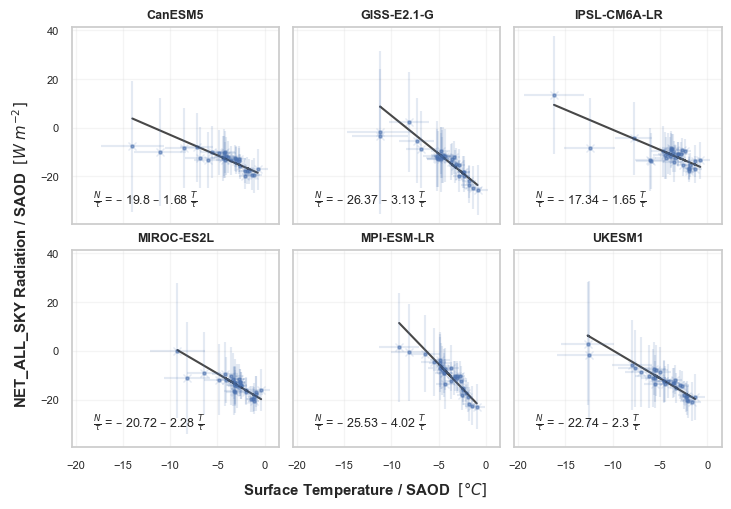

In [44]:
plot_radiation_vs_tas_6_models(volc_dict, "net_all_sky")

In [45]:
# plot_radiation_vs_tas_6_models(volc_dict, "net_all_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "net_clear_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "net_cre")

In [46]:
# plot_radiation_vs_tas_6_models(volc_dict, "sw_all_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "sw_clear_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "sw_cre")

In [47]:
# plot_radiation_vs_tas_6_models(volc_dict, "lw_all_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "lw_clear_sky")
# plot_radiation_vs_tas_6_models(volc_dict, "lw_cre")

### 6.2 Plot for simple + complex linear model

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


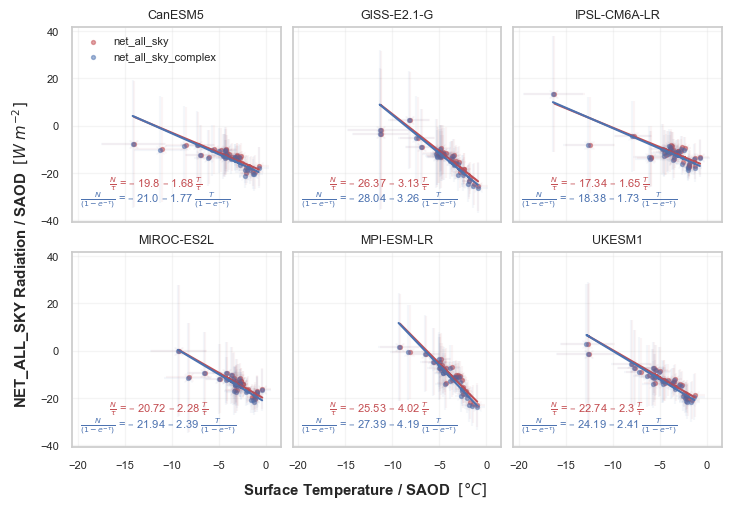

In [48]:
plot_radiation_vs_tas_2_lines_6_models(volc_dict, "net_all_sky")

In [49]:
# plot_radiation_vs_tas_2_lines_6_models(volc_dict, "net_clear_sky")

In [50]:
# plot_radiation_vs_tas_2_lines_6_models(volc_dict, "sw_all_sky")

In [51]:
# plot_radiation_vs_tas_2_lines_6_models(volc_dict, "lw_all_sky")

### 6.3 Plot of uncertainty in linear parameters


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


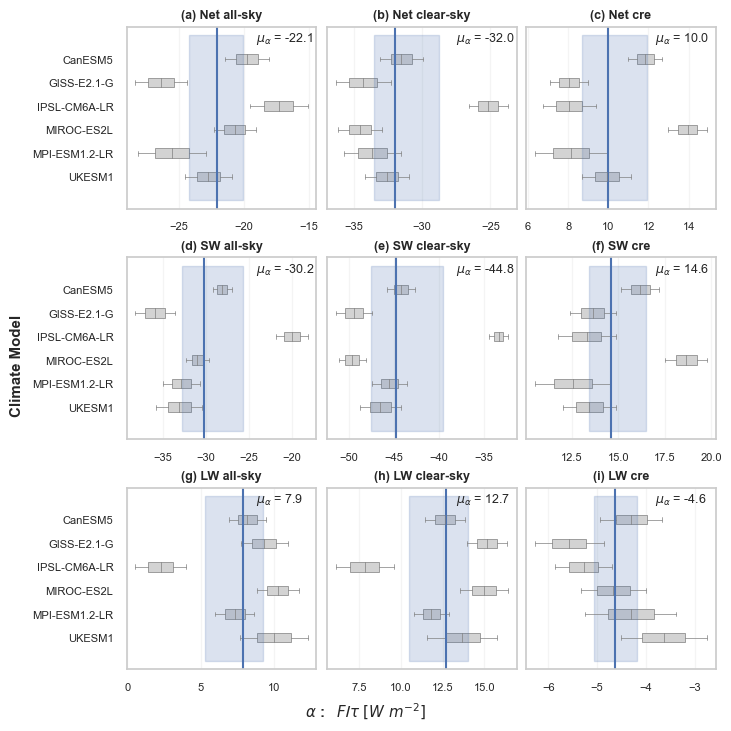

In [52]:
plot_uncertainty_in_alpha(volc_forcing_df_long, "simple", 0.90)